## Visibilities for a point source

In [4]:
%load_ext autoreload
import sys
sys.path.append("../")
import numpy as np
import imcurio as imc
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%autoreload
B = imc.SimBox("../sims/HImesh_0512_z100.fits")

Box size: 32.81-20.88 deg from z=0.72-1.33


In [34]:
## Let's put a source with unit flux at offset_x and offfset_y in degress
offset_x_rad = 3.4 / 180 * np.pi 
offset_y_rad = 5.6 / 180 * np.pi 
offset_xi = np.rint(offset_x_rad/B.Dpix_rad).astype(int)
offset_yi = np.rint(offset_y_rad/B.Dpix_rad).astype(int)

## now put this source in
B.box *= 0.0 ## set all pixels to zero
B.box[offset_xi,offset_yi,np.arange(B.Nz)]=1  ##except our point source

In [35]:
%autoreload
T=imc.TelSim()
visPS = T.get_visibilities(B, vopts={'interpolation':'lin'})

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


Text(0.5, 0, 'baseline number')

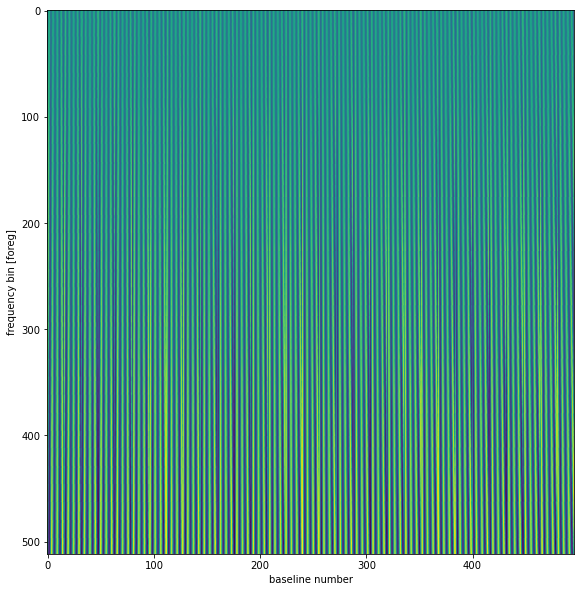

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(visPS))
plt.ylabel('frequency bin [foreg]')
plt.xlabel('baseline number')
